In [ ]:
%pylab inline
import numpy as np
import numpy.random as rand
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import random as rng
import seaborn as sns
import pickle
import argparse

In [61]:
methods = ['backprop', 'nodepert', 'feedbackalignment', 'weightsym']
#methods = ['backprop', 'feedbackalignment', 'weightsym']
learning_rate = 5e-6
lmbda = 5e-5
var_xi = 0.5

losses = {}
alignments = {}
n_in_epoch = {}
params = {}

#Load the results
for method in methods:
    fn_in = './experiments/rnn_np/%s_learning_rate_%f_lmbda_%f_varxi_%f.npz'%(method, learning_rate, lmbda, var_xi)
    p_in = open(fn_in,"rb")
    losses[method] = np.array(pickle.load(p_in))
    alignments[method] = np.array(pickle.load(p_in))
    n_in_epoch[method] = pickle.load(p_in)
    params[method] = pickle.load(p_in)

In [56]:
np.array(losses['backprop']).shape

(10, 1400)

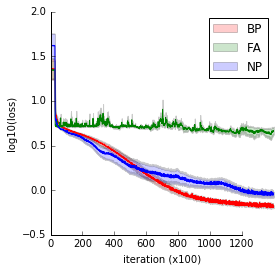

In [70]:
#Make plot of loss for each method
fig = plt.figure(figsize = (4,4))

sns.tsplot(np.log10(losses['backprop']), color='red')
sns.tsplot(np.log10(losses['feedbackalignment']), color = 'green')
#sns.tsplot(np.log10(losses['weightsym']), color = 'gray')
sns.tsplot(np.log10(losses['nodepert']))
plt.legend(['BP', 'FA', 'NP'])
plt.xlabel('iteration (x100)')
plt.ylabel('log10(loss)')
sns.despine(trim = True)
plt.savefig('./figures/cosyne_plots_fig1ci.eps')

In [8]:
#Make plot of alignment for each method

In [73]:
alignments['feedbackalignment'].shape

(10, 1400, 7)

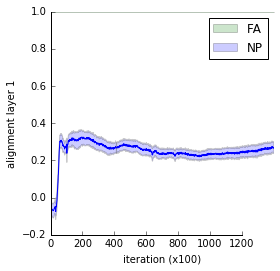

In [84]:
fig = plt.figure(figsize = (4,4))

layer = 0

sns.tsplot(alignments['feedbackalignment'][:,:,layer], color = 'green')
sns.tsplot(alignments['nodepert'][:,:,layer])
plt.legend(['FA', 'NP'])
plt.xlabel('iteration (x100)')
plt.ylabel('alignment layer 1')
sns.despine(trim = True)
#plt.savefig('./figures/cosyne_plots_fig1ci.eps')

In [76]:
alignments['nodepert']

array([[[-0.23506439,  0.06403197, -0.11758536, ..., -0.02106182,
         -0.10096012, -0.0422591 ],
        [-0.2295627 ,  0.05239919, -0.10482086, ...,  0.02031512,
         -0.14227927,  0.02053164],
        [-0.22955248,  0.04738754, -0.12356071, ...,  0.01539124,
         -0.17953445,  0.08973902],
        ...,
        [ 0.21472129,  0.0076221 ,  0.0063431 , ...,  0.00132493,
         -0.0049788 ,  0.0130998 ],
        [ 0.19747123,  0.00758362,  0.01471961, ..., -0.00998176,
         -0.00411527,  0.00471039],
        [ 0.21836653,  0.01172302,  0.00974736, ..., -0.01034987,
          0.00192959,  0.01006856]],

       [[-0.10809749,  0.04305727,  0.03584062, ..., -0.01450555,
         -0.00473394, -0.00227737],
        [-0.10937426,  0.02310665,  0.01654826, ..., -0.02405791,
         -0.0114922 , -0.02192374],
        [-0.11259557,  0.03112468,  0.02428503, ..., -0.01677371,
         -0.01012669, -0.03272394],
        ...,
        [ 0.10241041,  0.02058266,  0.03148606, ..., -